# Introduction to Natural Language Processing: Assignment 2

In this exercise we'll practice features extraction using Tf-Idf and SpaCy as well as multiclass text classification using the word embedding technique.

- You can use built-in Python packages, spaCy, scikit-learn, Numpy and Pandas.
- Please comment your code
- Submissions are due Tuesdays at 23:59 **only** on eCampus: **Assignmnets >> Student Submissions >> Assignment 3 (Deadline: 12.11.2024, at 23:59)**

- Name the file aproppriately: "Assignment_2_\<Your_Name\>.ipynb" and submit only the Jupyter Notebook file.
- If you are working in a group of two, please have the names of both of the members in the file name.
- Please use relative path, your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = bbc-news.csv, **DON'T use:** /Users/ComputerName/Username/Documents/.../bbc-news.csv

### Task 1 (2 points)

Write a function `extract_proper_nouns(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a list containing all proper nouns with more than one token.

**Example:**

text = "Honk Kong and Japan are two countries in Asia and New York is the largest city in the world"

return = `["New York", "Hong Kong"]` **(Note: it should not return "Japan")**

In [52]:
import spacy

def extract_proper_nouns(my_file_name):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    with open(my_file_name, 'r') as file:
        text = file.read()
        
    doc = nlp(text)
    several_token_propn = []
    # Extract named entities
    for ent in doc.ents:
        # Check if the entity is a proper noun
        if ent.label_ == "GPE" or ent.label_ == "PERSON" or ent.label_ == "ORG":
            if len(ent.text.split()) > 1:
                several_token_propn.append(ent.text)
        
    return several_token_propn

In [5]:
extract_proper_nouns('./test_name.txt')

['Natural Language Processing']

### Task 2 (3 points)

Write a function `common_lemma(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a Python dictionary with lemmas as `key` and the `value` that should contain a list with both verbs and nouns sharing the same lemma.

**Examples:**

1.
text = "When users google for a word or any query, their system internally runs a pipeline in order to process what the person is querying."

return = `{"query": ["query", "querying"]}`

2.
text = I really loved the movie and show, the movie was showing reality but it showed sometimes nonesense!

return = `{"show": ["show", "showing", "showed"]}` **(Note: it should not return "movie" because both "movie"s are NOUN)**

In [53]:
def common_lemma(my_file_name):
    tokens_with_common_lemma = {}
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    with open(my_file_name, 'r') as file:
        text = file.read()

    doc = nlp(text)
    for token in doc:
        # Check if the token is already in the dictionary
        if token.lemma_ not in tokens_with_common_lemma:
            tokens_with_common_lemma[token.lemma_] = [token.text]
        else:
            tokens_with_common_lemma[token.lemma_].append(token.text)
    tokens_with_common_lemma_final = {}
    for token in tokens_with_common_lemma:
        # Remove duplicates
        tokens_with_common_lemma[token] = set(tokens_with_common_lemma[token])\
        # Check if the lemma has more than one token, because we are looking for common lemmas
        if len(tokens_with_common_lemma[token]) > 1:
            tokens_with_common_lemma_final[token] = tokens_with_common_lemma[token]
    return(tokens_with_common_lemma_final)

In [14]:
common_lemma('./test_lemma.txt')

{'show': {'show', 'showed', 'showing'},
 'be': {'is', 'was'},
 'query': {'query', 'querying'}}

### Task 3 (1 point)

Load the data `bbc-text.csv`; This datata consists of 2225 documents from the BBC news website corresponding to stories from 2004-2005.

In [25]:
import pandas as pd
df_bbc = pd.read_csv('bbc-news.csv')
df_bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [26]:
df_bbc['text'].iloc[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

### Task 4 (1 point)

Show how many articles we have for each topical area (class label) in the dataset using a plot.

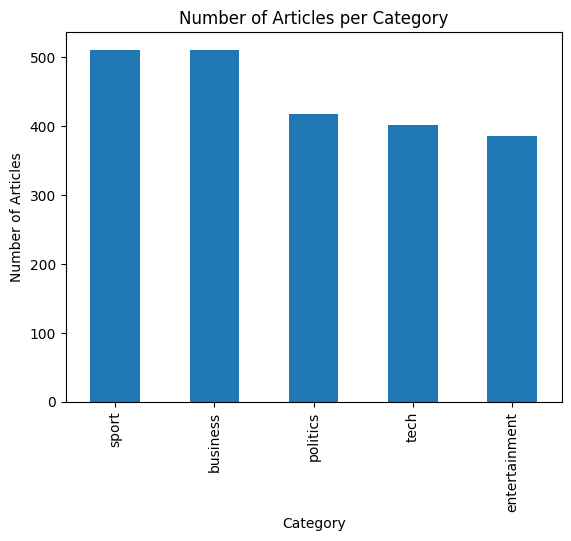

In [54]:
import matplotlib.pyplot as plt

# Count the number of articles for each category
category_counts = df_bbc['category'].value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Category')
plt.show()

### Task 5 (2 point)

Preprocessing: Define two following functions and apply them to the dataset:
1. Remove punctuation
2. Remove any numbers

In [55]:
def remove_punctuation(corpus):
    cleaned_corpus = corpus.str.replace('[^\w\s]', '', regex=True)
    return(cleaned_corpus)

def remove_numbers(corpus):
    cleaned_corpus = corpus.str.replace('\d+', '', regex=True)
    return(cleaned_corpus)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dle\AppData\Local\Temp\ipykernel_14480\3652004134.py:2: SyntaxWarning: invalid escape sequence '\w'
  cleaned_corpus = corpus.str.replace('[^\w\s]', '', regex=True)
C:\Users\dle\AppData\Local\Temp\ipykernel_14480\3652004134.py:6: SyntaxWarning: invalid escape sequence '\d'
  cleaned_corpus = corpus.str.replace('\d+', '', regex=True)


In [27]:
# Apply the remove_punctuation function
df_bbc['text'] = remove_punctuation(df_bbc['text'])

# Apply the remove_numbers function
df_bbc['text'] = remove_numbers(df_bbc['text'])

### Task 6.1 (1 points)

Split the data into training and test set (70% and 30%) using scikit-learn, shuffle it, and set the `seed=101 (random_state)`.

**NOTE:** If working with this dataset is not computationaly possible for you, you can work only with a subset of the dataset (i.e., the first 1000 rows) and use only the first 150 tokens for each article. You should point this out in your code.

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_bbc['text'], df_bbc['category'], test_size=0.3, random_state=101)

### Task 6.2 (3 points)

### **Training models on TF-IDF vectors:**

a) Convert each article in your data splits to a vector representation using the tf-idf-vectorizer.

b) Using the vectors from the previous step, train the `MLPClassifier` and another model of your choice from the scikit-learn library.

c) Test both of your models on the test set from Task 6.1.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=101)

# Train the classifier on the training data
mlp_classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
y_pred_MLP_tfidf = mlp_classifier.predict(X_test_tfidf)


               precision    recall  f1-score   support

     business       0.97      0.99      0.98       155
entertainment       0.98      0.96      0.97       117
     politics       0.97      0.98      0.98       122
        sport       0.99      0.99      0.99       153
         tech       0.99      0.98      0.98       121

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668

[[153   1   1   0   0]
 [  1 112   3   0   1]
 [  2   0 120   0   0]
 [  1   0   0 152   0]
 [  1   1   0   1 118]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)

# Train the classifier on the training data
rf_classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
y_pred_RF_tfidf = rf_classifier.predict(X_test_tfidf)

               precision    recall  f1-score   support

     business       0.93      0.97      0.95       155
entertainment       0.98      0.96      0.97       117
     politics       0.98      0.97      0.97       122
        sport       0.98      0.99      0.99       153
         tech       0.98      0.93      0.96       121

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668

[[151   0   3   0   1]
 [  3 112   0   1   1]
 [  3   0 118   1   0]
 [  1   0   0 152   0]
 [  5   2   0   1 113]]


### Task 6.3 (3 points)

### **Training models on SpaCy model vector representation:**

a) Convert each article in your data splits to a vector representation using the pre-trained spaCy model. (**Hint:** It should be stored as an array)

b) Using the vectors from the previous step, train the `MLPClassifier` and another model of your choice from the scikit-learn library.

c) Test both of your models on the test set from Task 6.1.

In [47]:
import numpy as np
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to convert text to vector using spaCy
def text_to_spacy_vector(text_series):
    return text_series.apply(lambda x: nlp(x).vector)

# Convert the training and test sets to spaCy vectors
X_train_spacy = text_to_spacy_vector(X_train)
X_test_spacy = text_to_spacy_vector(X_test)

# Convert the series of vectors to a numpy array
X_train_spacy = np.stack(X_train_spacy.values)
X_test_spacy = np.stack(X_test_spacy.values)

In [ ]:
# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=101)

# Train the classifier on the training data
mlp_classifier.fit(X_train_spacy, y_train)

# Predict the labels for the test set
y_pred_MLP_spacy = mlp_classifier.predict(X_test_spacy)

               precision    recall  f1-score   support

     business       0.77      0.77      0.77       155
entertainment       0.68      0.68      0.68       117
     politics       0.69      0.69      0.69       122
        sport       0.88      0.85      0.87       153
         tech       0.73      0.78      0.75       121

     accuracy                           0.76       668
    macro avg       0.75      0.75      0.75       668
 weighted avg       0.76      0.76      0.76       668

[[120   5  12   1  17]
 [  7  79  16   8   7]
 [ 11  11  84   7   9]
 [  5  11   5 130   2]
 [ 12  10   4   1  94]]


c:\Users\dle\Documents\IntroNLP\nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)

# Train the classifier on the training data
rf_classifier.fit(X_train_spacy, y_train)

# Predict the labels for the test set
y_pred_RF_spacy = rf_classifier.predict(X_test_spacy)

               precision    recall  f1-score   support

     business       0.68      0.80      0.74       155
entertainment       0.72      0.58      0.64       117
     politics       0.65      0.61      0.63       122
        sport       0.83      0.85      0.84       153
         tech       0.74      0.73      0.73       121

     accuracy                           0.73       668
    macro avg       0.72      0.71      0.72       668
 weighted avg       0.73      0.73      0.72       668

[[124   7  13   1  10]
 [ 20  68  10  15   4]
 [ 15   9  75   7  16]
 [  4   8  10 130   1]
 [ 19   2   8   4  88]]


### Task 7 (4 points)

Using the predictions from the four classifiers, evaluate the models and report accuracy, recall, precision, f1 scores and confusion matrix for each of them. (**Hint:** You should build a confusion matrix for multi-class classification)

In [51]:
print('MLP-tfidf')
print(classification_report(y_test, y_pred_MLP_tfidf))
print(confusion_matrix(y_test, y_pred_MLP_tfidf))
print('-'*30)
print('RF-tfidf')
print(classification_report(y_test, y_pred_RF_tfidf))
print(confusion_matrix(y_test, y_pred_RF_tfidf))
print('-'*30)
print('MLP-spacy')
print(classification_report(y_test, y_pred_MLP_spacy))
print(confusion_matrix(y_test, y_pred_MLP_spacy))
print('-'*30)
print('RF-spacy')
print(classification_report(y_test, y_pred_RF_spacy))
print(confusion_matrix(y_test, y_pred_RF_spacy))

MLP-tfidf
               precision    recall  f1-score   support

     business       0.97      0.99      0.98       155
entertainment       0.98      0.96      0.97       117
     politics       0.97      0.98      0.98       122
        sport       0.99      0.99      0.99       153
         tech       0.99      0.98      0.98       121

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668

[[153   1   1   0   0]
 [  1 112   3   0   1]
 [  2   0 120   0   0]
 [  1   0   0 152   0]
 [  1   1   0   1 118]]
------------------------------
RF-tfidf
               precision    recall  f1-score   support

     business       0.93      0.97      0.95       155
entertainment       0.98      0.96      0.97       117
     politics       0.98      0.97      0.97       122
        sport       0.98      0.99      0.99       153
         tech       0.98      0.93      0.96       121

    